In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [ ]:
For MaxEnt

In [2]:
bug_name_list_full = ['T. sanguisuga','T. rubida',' T. recurva','T. protracta','T. mexicana','T. mazzottii','T. neotomae','T. longipennis',' P. lecticularia',' T. indictiva','T. gerstaeckeri','T. dimidiata']
method_name_list = ["pixel_nobuffer_off","pixel_nobuffer_on","pixel_buffer_off","pixel_buffer_on","grid_nobuffer_off","grid_nobuffer_on","grid_buffer_off","grid_buffer_on"]
bug_name_list_c = ['San','Rub','Rec','Pro','Mex','Maz','Neo','Lon','Lec','Ind','Ger','Dim']
label_list = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
output_dir = "/Users/liting/Documents/GitHub/r_chagasM/output/"

Calculate the mean and std evaluation metric scores

In [3]:
def get_mean_svd(csv_saving_path,csv_result_path):
    this_csv_to_plot = pd.read_csv(csv_saving_path)
    this_csv_to_plot.keys
    mae_list = [this_csv_to_plot['mae'][0]]
    auc_list = [this_csv_to_plot['auc'][0]]
    bias_list = [this_csv_to_plot['bias'][0]]
    tss_list = [this_csv_to_plot['tss'][0]]
    threshold_list = [this_csv_to_plot['tss_threshold'][0]]
    count = 1
    while count < 10:
        this_mae_name = 'mae.'+str(count)
        this_auc_name = 'auc.'+str(count)
        this_bias_name = 'bias.'+str(count)
        this_tss_name = 'tss.'+str(count)
        this_threshold_name = 'tss_threshold.'+str(count)
        mae_list.append(this_csv_to_plot[this_mae_name][0])
        auc_list.append(this_csv_to_plot[this_auc_name][0])
        bias_list.append(this_csv_to_plot[this_bias_name][0])
        tss_list.append(this_csv_to_plot[this_tss_name][0])
        threshold_list.append(this_csv_to_plot[this_threshold_name][0])
        count+=1

    this_df = pd.DataFrame({'auc_mean': [np.mean(auc_list)], 'auc_std': [np.std(auc_list)],
                            'mae_mean': [np.mean(mae_list)], 'mae_std': [np.std(mae_list)],
                            'bias_mean': [np.mean(bias_list)], 'bias_std': [np.std(bias_list)],
                            'tss_mean': [np.mean(tss_list)], 'tss_std': [np.std(tss_list)],
                            'tss_threshold_mean': [np.mean(threshold_list)], 'tss_threshold_std': [np.std(threshold_list)],})
    this_df.to_csv(csv_result_path)
    return this_df

In [4]:
def generate_result_csv(output_dir,this_bug,method_name_list):
    this_bug_dict = {}
    for method_name in method_name_list:
        this_result_def = get_mean_svd(csv_saving_path=output_dir+method_name+"/"+this_bug+"/evaluate/cv_metric_results.csv",
                                    csv_result_path=output_dir+method_name+"/"+this_bug+"/evaluate/cv_metric_mean_std_results.csv")
        this_bug_dict[method_name] = this_result_def
    return this_bug_dict


In [5]:

bug_method_dict = {}
for this_bug in bug_name_list_c:
    this_bug_dict = generate_result_csv(output_dir,this_bug,method_name_list)
    bug_method_dict[this_bug] = this_bug_dict


In [6]:
# Initialize a list to hold all DataFrames
dataframes = []

for outer_key, nested_dict in bug_method_dict.items():
    for method_name, df in nested_dict.items():
        if isinstance(df, pd.DataFrame):  # Check if the value is a DataFrame
            df = df.copy()  # Make a copy of the DataFrame
            df['species'] = outer_key  # Add the outer key as a new column
            df['method_name'] = method_name  # Add the method name as a new column
            dataframes.append(df)  # Append the DataFrame to the list


# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)


# Export to CSV
combined_df.to_csv(output_dir + '/figures/combined_mean_std.csv', index=False)


Find the metric pair which has the lowest absolute Spearman correlation score 
(1) 

In [21]:
# for each bug, we produce correlation plot between each pair of mean values
def abs_correlation_all_cases(bug_array):
    this_fontsize = 20
    fig, ax = plt.subplots(figsize=(8,8))
    corr_df = bug_array.drop(["auc_std","mae_std","bias_std","tss_std","tss_threshold_mean","tss_threshold_std",'species','method_name'], axis=1)
    corr_df.rename(columns={"auc_mean": "AUC mean", "mae_mean": "MAE mean", "bias_mean": "Bias mean", "tss_mean": "TSS mean"},inplace=True)

    print(corr_df)
    coor_results = corr_df.corr(method="spearman")
    print(coor_results)


    ax_c = sns.heatmap(np.abs(coor_results),vmin=0, vmax=1,cbar=True,cmap='viridis',annot=True,annot_kws={"fontsize":this_fontsize})

    ax.tick_params(axis='x', labelsize= this_fontsize-5 )
    ax.tick_params(axis='y', labelsize= this_fontsize-5 )

    cax = ax_c.figure.axes[-1]
    cax.tick_params(labelsize=15)

    plt.suptitle("Absolute Value of Spearman Correlation Coefficient",size = this_fontsize)
    
    plt.tight_layout() 
    plt.savefig(output_dir+"/figures/method_performance/maxent_abs_correlation_Spearman.png",dpi=200,bbox_inches='tight')
    

    AUC mean  MAE mean  Bias mean  TSS mean
0   0.974374  0.107940   0.007136  0.880364
1   0.970983  0.112470  -0.000204  0.875677
2   0.994440  0.041913   0.009643  0.947082
3   0.992552  0.044872   0.005171  0.939958
4   0.975197  0.065456  -0.024923  0.888452
..       ...       ...        ...       ...
91  0.997251  0.024635   0.010793  0.967556
92  0.995826  0.028023   0.005679  0.962995
93  0.993136  0.030299   0.002767  0.958398
94  0.998349  0.021483   0.012086  0.978855
95  0.997468  0.022581   0.010314  0.980239

[96 rows x 4 columns]
           AUC mean  MAE mean  Bias mean  TSS mean
AUC mean   1.000000 -0.591630   0.790518  0.916319
MAE mean  -0.591630  1.000000  -0.267010 -0.365966
Bias mean  0.790518 -0.267010   1.000000  0.795090
TSS mean   0.916319 -0.365966   0.795090  1.000000


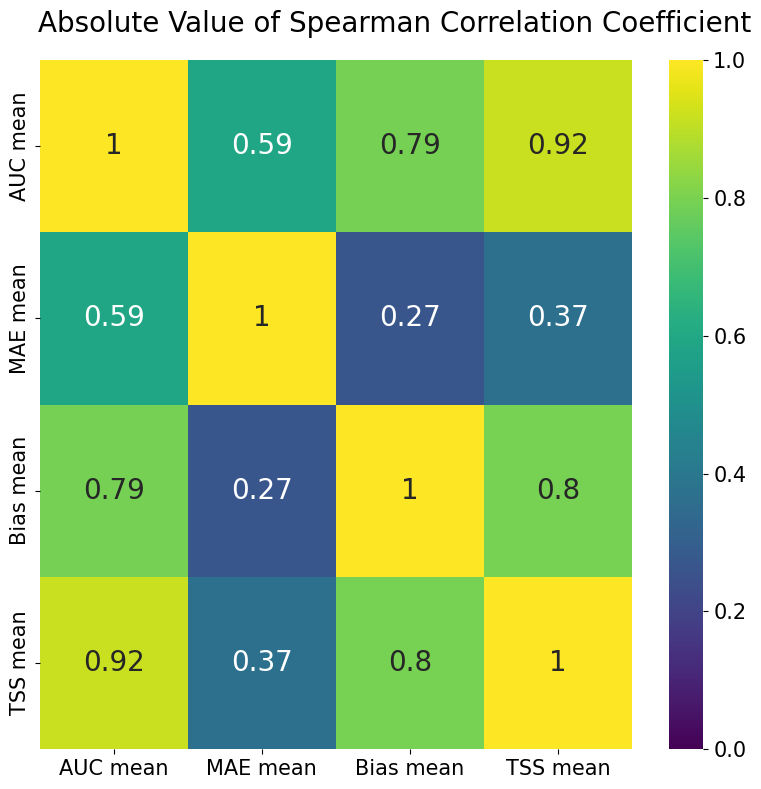

In [22]:
abs_correlation_all_cases(combined_df)

Find the Best Method with Bias and MAE 

In [23]:
def combined_standard_deviation(means, stds):
    n = len(means)
    combined_mean = np.mean(means)
    
    # Calculate the combined variance
    variance_within_groups = np.sum([std**2 for std in stds]) / n
    variance_between_groups = np.sum([(mean - combined_mean)**2 for mean in means]) / n
    
    combined_variance = variance_within_groups + variance_between_groups
    
    combined_std = np.sqrt(combined_variance)
    
    return combined_mean, combined_std

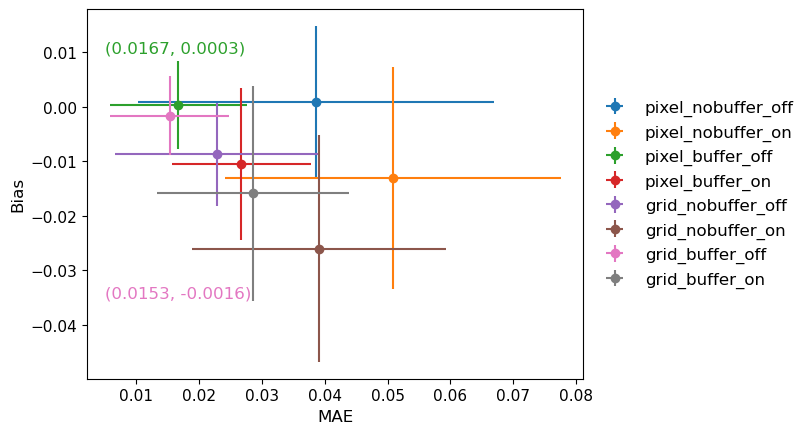

In [42]:
mae_bias_dict = {}
this_fontsize = 12
for this_method in method_name_list:
    this_method_values = combined_df[combined_df["method_name"]==this_method]
    mae_mean_list = this_method_values["mae_mean"]
    mae_std_list = this_method_values["mae_std"]
    bias_mean_list = this_method_values["bias_mean"]
    bias_std_list = this_method_values["bias_std"]
    mae_combined_mean, mae_combined_std = combined_standard_deviation(mae_mean_list, mae_std_list)
    bias_combined_mean, bias_combined_std = combined_standard_deviation(bias_mean_list, bias_std_list)
    plt.errorbar(mae_combined_mean, bias_combined_mean, xerr=mae_combined_std,yerr=bias_combined_std, fmt="o", label=this_method)
    mae_bias_dict[this_method] = {"mae_mean":mae_combined_mean,"mae_std":mae_combined_std,"bias_mean":bias_combined_mean,"bias_std":bias_combined_std}

plt.xlabel("MAE",fontsize=this_fontsize)
plt.ylabel("Bias",fontsize=this_fontsize)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False,fontsize=this_fontsize)
plt.text(0.005,-0.035,"("+str(round(mae_bias_dict["grid_buffer_off"]["mae_mean"],4))+", "+str(round(mae_bias_dict["grid_buffer_off"]["bias_mean"],4))+")", fontsize=this_fontsize,color='tab:pink')
plt.text(0.005,0.01,"("+str(round(mae_bias_dict["pixel_buffer_off"]["mae_mean"],4))+", "+str(round(mae_bias_dict["pixel_buffer_off"]["bias_mean"],4))+")", fontsize=this_fontsize,color='tab:green')
plt.tick_params(axis='x', labelsize= this_fontsize-1)
plt.tick_params(axis='y', labelsize= this_fontsize-1)
plt.savefig(output_dir+"/figures/method_performance/bias_mae_best_method.png",dpi=200,bbox_inches='tight')
    


For Random Forest

In [43]:
bug_name_list_full = ['T. sanguisuga','T. rubida',' T. recurva','T. protracta','T. mexicana','T. mazzottii','T. neotomae','T. longipennis',' P. lecticularia',' T. indictiva','T. gerstaeckeri','T. dimidiata']
method_name_list = ["pixel_nobuffer_off","pixel_nobuffer_on","pixel_buffer_off","pixel_buffer_on","grid_nobuffer_off","grid_nobuffer_on","grid_buffer_off","grid_buffer_on"]
bug_name_list_c = ['San','Rub','Rec','Pro','Mex','Maz','Neo','Lon','Lec','Ind','Ger','Dim']
label_list = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
output_dir = "/Users/liting/Documents/GitHub/r_chagasM/output/rf/"

In [45]:
bug_method_dict = {}
for this_bug in bug_name_list_c:
    this_bug_dict = generate_result_csv(output_dir,this_bug,["pixel_buffer_off"])
    bug_method_dict[this_bug] = this_bug_dict

# Initialize a list to hold all DataFrames
dataframes = []

for outer_key, nested_dict in bug_method_dict.items():
    for method_name, df in nested_dict.items():
        if isinstance(df, pd.DataFrame):  # Check if the value is a DataFrame
            df = df.copy()  # Make a copy of the DataFrame
            df['species'] = outer_key  # Add the outer key as a new column
            df['method_name'] = method_name  # Add the method name as a new column
            dataframes.append(df)  # Append the DataFrame to the list


# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)


# Export to CSV
combined_df.to_csv(output_dir + '/combined_mean_std.csv', index=False)
